# Imports and vars

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from skfeature.function.similarity_based import fisher_score

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC


from utils import prepare_transactions_dataset, read_parquet_dataset_from_local

In [2]:
path = 'data/'

# Data load

In [3]:
df = prepare_transactions_dataset(path, 3, 12, verbose=True)

Transforming transactions data:   0%|          | 0/4 [00:00<?, ?it/s]

train_data/train_data_0.pq
train_data/train_data_1.pq
train_data/train_data_2.pq
train_data/train_data_3.pq
train_data/train_data_4.pq
train_data/train_data_5.pq
train_data/train_data_6.pq
train_data/train_data_7.pq
train_data/train_data_8.pq
train_data/train_data_9.pq
train_data/train_data_10.pq
train_data/train_data_11.pq
Reading chunks:

train_data/train_data_0.pq
train_data/train_data_1.pq
train_data/train_data_2.pq


Reading dataset with pandas:   0%|          | 0/3 [00:00<?, ?it/s]

chunk_path train_data/train_data_0.pq
chunk_path train_data/train_data_1.pq
chunk_path train_data/train_data_2.pq
train_data/train_data_0.pq
train_data/train_data_1.pq
train_data/train_data_2.pq
train_data/train_data_3.pq
train_data/train_data_4.pq
train_data/train_data_5.pq
train_data/train_data_6.pq
train_data/train_data_7.pq
train_data/train_data_8.pq
train_data/train_data_9.pq
train_data/train_data_10.pq
train_data/train_data_11.pq
Reading chunks:

train_data/train_data_3.pq
train_data/train_data_4.pq
train_data/train_data_5.pq


Reading dataset with pandas:   0%|          | 0/3 [00:00<?, ?it/s]

chunk_path train_data/train_data_3.pq
chunk_path train_data/train_data_4.pq
chunk_path train_data/train_data_5.pq
train_data/train_data_0.pq
train_data/train_data_1.pq
train_data/train_data_2.pq
train_data/train_data_3.pq
train_data/train_data_4.pq
train_data/train_data_5.pq
train_data/train_data_6.pq
train_data/train_data_7.pq
train_data/train_data_8.pq
train_data/train_data_9.pq
train_data/train_data_10.pq
train_data/train_data_11.pq
Reading chunks:

train_data/train_data_6.pq
train_data/train_data_7.pq
train_data/train_data_8.pq


Reading dataset with pandas:   0%|          | 0/3 [00:00<?, ?it/s]

chunk_path train_data/train_data_6.pq
chunk_path train_data/train_data_7.pq
chunk_path train_data/train_data_8.pq
train_data/train_data_0.pq
train_data/train_data_1.pq
train_data/train_data_2.pq
train_data/train_data_3.pq
train_data/train_data_4.pq
train_data/train_data_5.pq
train_data/train_data_6.pq
train_data/train_data_7.pq
train_data/train_data_8.pq
train_data/train_data_9.pq
train_data/train_data_10.pq
train_data/train_data_11.pq
Reading chunks:

train_data/train_data_9.pq
train_data/train_data_10.pq
train_data/train_data_11.pq


Reading dataset with pandas:   0%|          | 0/3 [00:00<?, ?it/s]

chunk_path train_data/train_data_9.pq
chunk_path train_data/train_data_10.pq
chunk_path train_data/train_data_11.pq


In [4]:
df.tail()

,rn,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,pre_since_opened_8,...,pre_loans3060_3,pre_loans3060_4,pre_loans3060_6,pre_loans6090_0,pre_loans90_3,pre_loans5_10,pre_loans530_5,pre_loans530_8,pre_loans530_9,pre_loans530_17
id,,,,,,,,,,,,,,,,,,,,,
2999995,66,1,2,0,0,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999996,91,0,1,0,1,1,5,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999997,55,0,0,1,1,3,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999998,15,0,0,0,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999999,78,2,0,1,2,0,1,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(3000000, 420)

In [6]:
# добавим в датасет столбец с целевой переменной
target = pd.read_csv(f'{path}/train_target.csv')
train_df = pd.merge(df, target, on='id')
train_df.head()

,id,rn,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,...,pre_loans3060_4,pre_loans3060_6,pre_loans6090_0,pre_loans90_3,pre_loans5_10,pre_loans530_5,pre_loans530_8,pre_loans530_9,pre_loans530_17,flag
0,0,55,0,1,1,1,1,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,105,0,0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,6,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,120,0,3,1,0,2,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
print("Размер датасета:")
display(train_df.shape)

print("Наличие пропусков:")
display(train_df.isna().sum())

print("Проверка сбалансированности выборки:")
display(train_df['flag'].value_counts())

print('Занимаемый объем оперативной памяти: {:.2f} Gb'.format(train_df.memory_usage(index=True).sum() / 1073741824))

Размер датасета:


(3000000, 422)

Наличие пропусков:


id                    0
rn                    0
pre_since_opened_0    0
pre_since_opened_1    0
pre_since_opened_2    0
                     ..
pre_loans530_5        0
pre_loans530_8        0
pre_loans530_9        0
pre_loans530_17       0
flag                  0
Length: 422, dtype: int64

Проверка сбалансированности выборки:


0    2893558
1     106442
Name: flag, dtype: int64

Занимаемый объем оперативной памяти: 1.63 Gb


In [8]:
# сохраненим полученный датафрейм
train_df.to_csv(f'{path}/train_data.csv')

В процессе преобразования бинаризированных признаков, при загрузке данных, не было возможности удалить первые уровни, используя параметр 'drop_first' в методе 'get_dummies'.

В результате были образованы зависимые переменные в каждом из признаков. 

Исправим ситуацию и удалим их из результирующего датафрейма.

In [9]:
# подготовим список исходных признаков
source_features = list(read_parquet_dataset_from_local(path, 0, 1).columns.values)
source_features.remove('id'), source_features.remove('rn')

# с помощью цикла создадим список фич, без первого признака в каждом блоке.
features = list(train_df.columns.values)

for feat in source_features:
    for i in range(len(features)):
        if features[i].startswith(feat):
            features.pop(i)
            break

# проверим, все ли фичи были отброшены.
print(f'отброшено {len(train_df.columns.values) - len(features)} из {len(source_features)} фич.')

# удалим отброшенные фичи из тренировочного датафрейма
train_df = train_df[features]
train_df.head()

train_data/train_data_0.pq
train_data/train_data_1.pq
train_data/train_data_2.pq
train_data/train_data_3.pq
train_data/train_data_4.pq
train_data/train_data_5.pq
train_data/train_data_6.pq
train_data/train_data_7.pq
train_data/train_data_8.pq
train_data/train_data_9.pq
train_data/train_data_10.pq
train_data/train_data_11.pq


Reading dataset with pandas:   0%|          | 0/1 [00:00<?, ?it/s]

chunk_path train_data/train_data_0.pq
отброшено 59 из 59 фич.


,id,rn,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,pre_since_opened_8,...,pre_loans3060_4,pre_loans3060_6,pre_loans6090_0,pre_loans90_3,pre_loans5_10,pre_loans530_5,pre_loans530_8,pre_loans530_9,pre_loans530_17,flag
0,0,55,1,1,1,1,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,105,0,1,0,0,0,0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,6,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,120,3,1,0,2,1,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
# сохраненим полученный датафрейм
train_df.to_csv(f'{path}/train_data.csv')

# Зависимости переменных. Отбор признаков

## Корреляция

In [11]:
corr = train_df.drop('id', axis=1).corr()

In [12]:
corr

,rn,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,pre_since_opened_8,pre_since_opened_9,...,pre_loans3060_4,pre_loans3060_6,pre_loans6090_0,pre_loans90_3,pre_loans5_10,pre_loans530_5,pre_loans530_8,pre_loans530_9,pre_loans530_17,flag
rn,1.000000,0.318862,0.337527,0.356892,0.379585,0.377272,0.392603,0.297506,0.352261,0.304761,...,-4.047485e-04,2.241198e-03,-4.714891e-05,0.001041,-1.201284e-04,-4.668083e-05,1.957658e-03,1.246408e-04,1.084034e-03,-0.004693
pre_since_opened_1,0.318862,1.000000,0.169426,0.148932,0.080694,0.106624,0.051077,0.151344,0.000424,0.161630,...,-3.288003e-04,4.328715e-04,-3.288003e-04,-0.001040,-3.288003e-04,6.212310e-04,-5.694991e-04,1.006783e-04,-3.288003e-04,0.007642
pre_since_opened_2,0.337527,0.169426,1.000000,0.174490,0.105594,0.123261,0.060964,0.136361,0.008580,0.154959,...,-3.256415e-04,-1.796649e-04,4.312395e-04,-0.001376,-3.256415e-04,-7.281569e-04,3.099434e-04,1.055981e-04,-3.256415e-04,0.002155
pre_since_opened_3,0.356892,0.148932,0.174490,1.000000,0.143038,0.189790,0.091997,0.093119,0.025764,0.114360,...,-3.136243e-04,-1.343401e-04,-3.136243e-04,-0.001402,-3.136243e-04,-7.012858e-04,2.146111e-03,1.490922e-04,-3.136243e-04,-0.006332
pre_since_opened_4,0.379585,0.080694,0.105594,0.143038,1.000000,0.211299,0.175886,0.055994,0.065257,0.067263,...,-3.123643e-04,4.539892e-04,-3.123643e-04,-0.001184,-3.123643e-04,-3.645977e-04,-5.410310e-04,-2.514504e-04,-3.123643e-04,-0.014865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pre_loans530_5,-0.000047,0.000621,-0.000728,-0.000701,-0.000365,0.000347,-0.000450,0.000273,-0.000361,-0.000401,...,-7.453567e-07,-1.825745e-06,-7.453567e-07,-0.000005,-7.453567e-07,1.000000e+00,-1.290996e-06,-1.490714e-06,-7.453567e-07,-0.000248
pre_loans530_8,0.001958,-0.000569,0.000310,0.002146,-0.000541,-0.000533,-0.000197,-0.000562,0.001247,-0.000571,...,-5.773507e-07,-1.414216e-06,-5.773507e-07,-0.000004,-5.773507e-07,-1.290996e-06,1.000000e+00,-1.154702e-06,-5.773507e-07,-0.000192
pre_loans530_9,0.000125,0.000101,0.000106,0.000149,-0.000251,-0.000615,-0.000664,0.000096,0.000038,0.000094,...,-6.666672e-07,-1.632996e-06,-6.666672e-07,-0.000004,-6.666672e-07,-1.490714e-06,-1.154702e-06,1.000000e+00,-6.666672e-07,0.002899
pre_loans530_17,0.001084,-0.000329,-0.000326,-0.000314,-0.000312,0.000464,0.000322,0.000420,0.000319,-0.000330,...,-3.333334e-07,-8.164975e-07,-3.333334e-07,-0.000002,-3.333334e-07,-7.453567e-07,-5.773507e-07,-6.666672e-07,1.000000e+00,-0.000111


<Axes: >

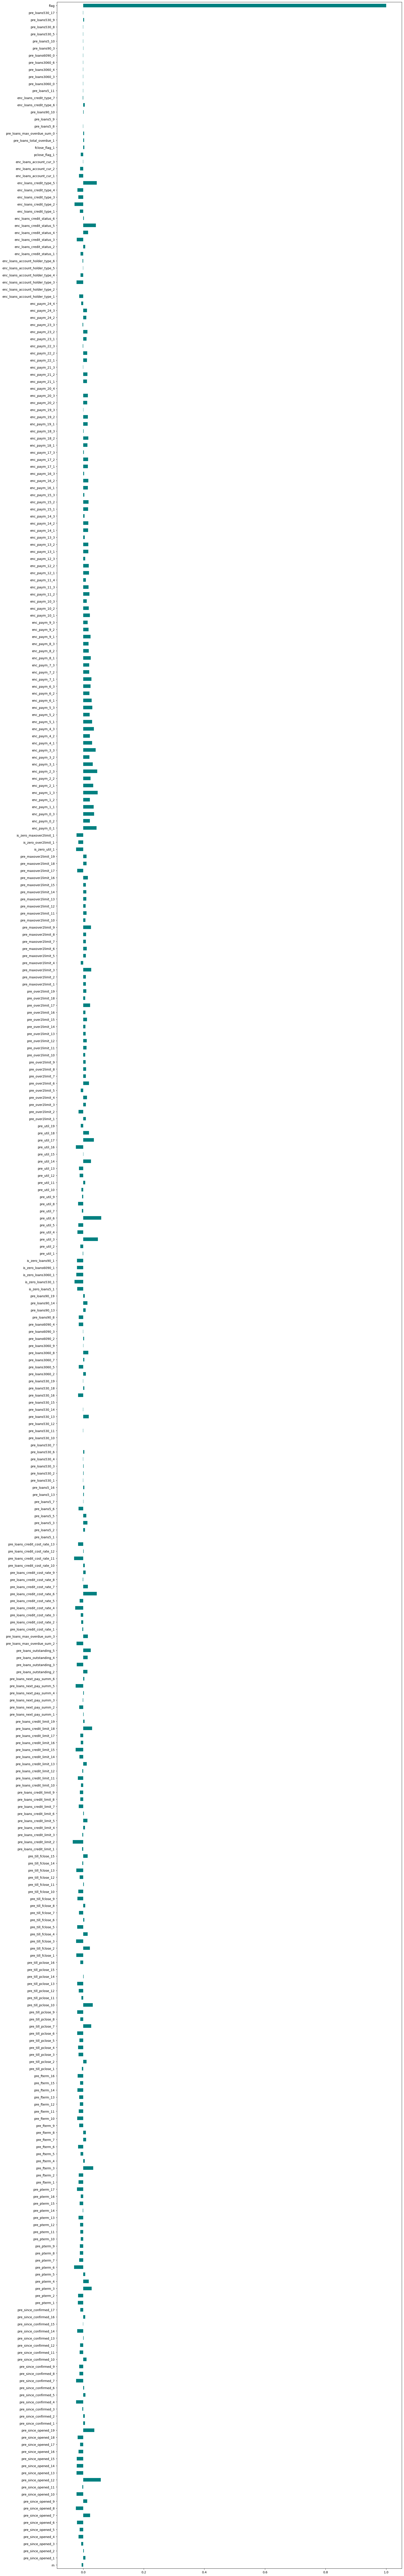

In [13]:
plt.figure(figsize=(20,150))
corr['flag'].plot(kind='barh', color='teal')

<Axes: >

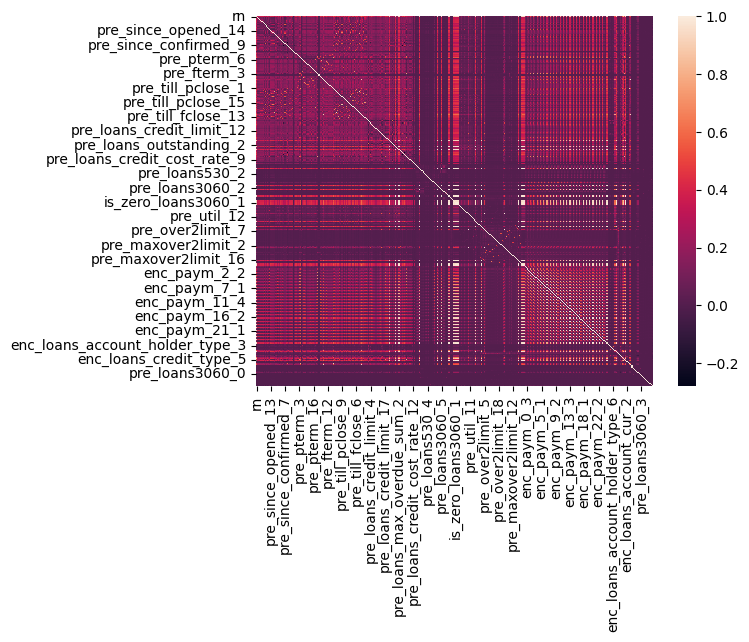

In [14]:
sns.heatmap(corr)

Значительных корреляций с целевой переменной не обнаружено, но есть некоторые зависимости между фичами.

##  Критерий Фишера (F-тест)

In [15]:
df_from_fisher = train_df[:5000].copy()

In [16]:
# Вычисляем критерий
# Где X, y - входные и выходные данные соответственно.
X = df_from_fisher.drop(['id','flag'], axis=1).to_numpy()
y = df_from_fisher['flag'].to_numpy()
ranks = fisher_score.fisher_score(X, y)

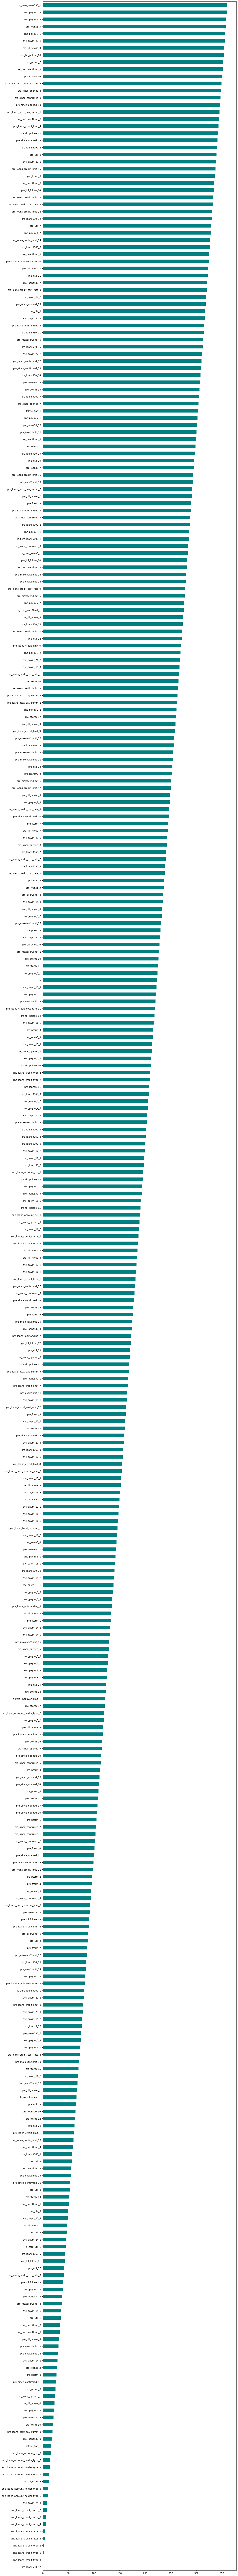

In [17]:
# Делаем график наших "фич"
feature_importances = pd.Series(ranks, df_from_fisher.drop(['id', 'flag'], axis=1).columns[0:len(df_from_fisher.columns)-1])
feature_importances = feature_importances.sort_values(ascending=True)
plt.figure(figsize=(15,200))
feature_importances.plot(kind='barh', color='teal')
plt.show()

Часть признаков имеет малую важность и их можно отбросить в процессе обучения.

# Моделирование.

In [18]:
train_df = pd.read_csv(f'{path}/train_data.csv')

In [21]:
# разделим датафрейм на тренировочную и тестовую выборки в пропорции 70/30.

X = train_df.drop(['id', 'flag'], axis=1)
y = train_df['flag'].ravel()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=38)

## Выбор модели

### Метод опорных векторов. Модель SVC.

In [20]:
'''
model = SVC(class_weight='balanced', random_state=38)

model.fit(Xtrain, ytrain)

predict_train = model.predict_proba(Xtrain)[:,1]
predict_test = model.predict_proba(Xtest)[:,1]
'''

"\nmodel = SVC(class_weight='balanced', random_state=38)\n\nmodel.fit(Xtrain, ytrain)\n\npredict_train = model.predict_proba(Xtrain)[:,1]\npredict_test = model.predict_proba(Xtest)[:,1]\n"

модель не отработала, требуется слишком много времени на обучение.

### Ансамбль деревьев

In [21]:
# построим стоковую модель ансабля деревьев

tree1 = RandomForestClassifier(random_state=38)
tree1.fit(Xtrain, ytrain)
tree1_predict = tree1.predict_proba(Xtest)[:,1]

print(f'roc-auc: {roc_auc_score(ytest, tree1_predict):.4f}')

roc-auc: 0.7046


In [22]:
# построим стоковую модель классификатора дополнительных деревьев

tree2 = ExtraTreesClassifier(random_state=38)
tree2.fit(Xtrain, ytrain)
tree2_predict = tree2.predict_proba(Xtest)[:,1]

print(f'roc-auc: {roc_auc_score(ytest, tree2_predict):.4f}')

roc-auc: 0.6973


Модель обучилась несколько быстрее ансамбля деревьев, но все равно долго. 

Попробуем использовать градиентный бустинг, учитывая большое количество объектов, возьмем модель которая использует градиентный бустинг на основе диаграмм.

In [23]:
# построим стоковую модель дерева классификации градиентного бустинга

tree3 = HistGradientBoostingClassifier(random_state=38)
tree3.fit(Xtrain, ytrain)
tree3_predict = tree3.predict_proba(Xtest)[:,1]

print(f'roc-auc: {roc_auc_score(ytest, tree3_predict):.4f}')

roc-auc: 0.7564


Модель HistGradientBoostingClassifier с стоковыми параметрами показала значительно более высокие значения показателей по скорости обучения и метрике качества. Остановимся на ней.

## Дерево решений. Модель Hist Gradient Boosting Classifier.

In [24]:
# посмотрим, какую метрику модель покажет при сбалансированных данных и метрике roc-auc, которую нам нужно улучшить.

HGBC = HistGradientBoostingClassifier(
    random_state=38,
    class_weight='balanced',
    scoring='roc_auc'
)

HGBC.fit(Xtrain, ytrain)

HistGradientBoostingClassifier(class_weight='balanced', random_state=38,
                               scoring='roc_auc')

In [25]:
predict_train = HGBC.predict_proba(Xtrain)[:,1]
predict_test = HGBC.predict_proba(Xtest)[:,1]

roc-auc train: 0.7629551757099896


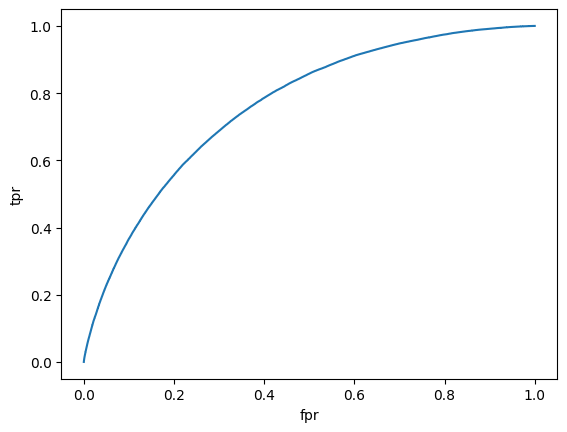

In [26]:
fpr, tpr, _ = roc_curve(ytrain, predict_train)
plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'roc-auc train: {roc_auc_score(ytrain, predict_train)}')

roc-auc test: 0.756574833656316


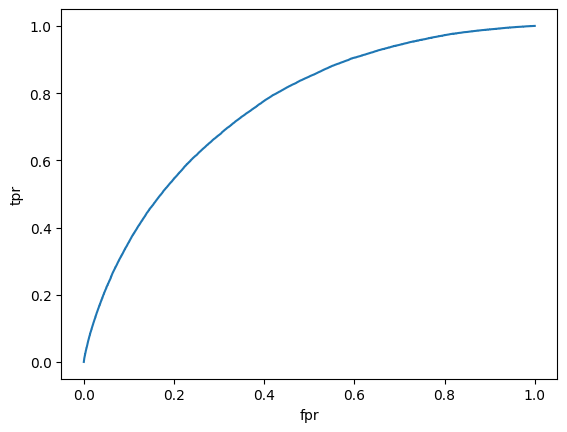

In [27]:
fpr, tpr, _ = roc_curve(ytest, predict_test)
plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'roc-auc test: {roc_auc_score(ytest, predict_test)}')

Качество модели улучшилось на 0.02%, но все же хотелось бы лучше. Попробуем подобрать параметры с помощью GridSearch..

## Gread Search

In [28]:
params = {
    #'loss': 'log_loss', 
    'learning_rate': np.arange(0.1, 1, 0.2), 
    'max_iter': np.arange(100, 300, 50), 
    #'max_leaf_nodes': None, 
    #max_depth=None, 
    'min_samples_leaf': np.arange(15, 50, 5), 
    'l2_regularization': np.arange(0.0, 1, 0.3) 
    #max_features=1.0, 
    #max_bins=255, 
    #categorical_features='warn', 
    #monotonic_cst=None, 
    #interaction_cst=None, 
    #warm_start=False, 
    #early_stopping='auto', 
    #'scoring': 'roc_auc', 
    #validation_fraction=0.1, 
    #n_iter_no_change=10, 
    #tol=1e-07, 
    #verbose=0, 
    #'random_state': 38, 
    #'class_weight': 'balanced'
}

In [29]:
gs = GridSearchCV(HistGradientBoostingClassifier(random_state=38, class_weight='balanced', scoring='roc_auc'), params, cv=5, scoring='roc_auc')

gs.fit(Xtrain, ytrain)

In [ ]:
display(gs.best_estimator_)
display(gs.best_score_)

HistGradientBoostingClassifier(class_weight='balanced', l2_regularization=0.6,
                               max_iter=200, min_samples_leaf=25,
                               random_state=38, scoring='roc_auc')

0.7539047719231736

In [ ]:
predict_train = gs.predict_proba(Xtrain)[:,1]
predict_test = gs.predict_proba(Xtest)[:,1]

roc-auc train: 0.7752033674924534
roc-auc test: 0.7588211015249471


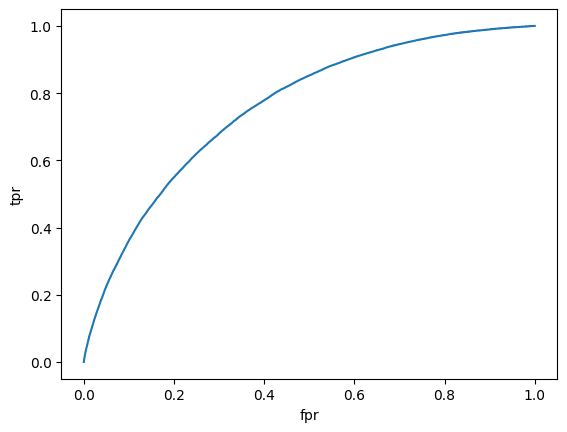

In [ ]:
print(f'roc-auc train: {roc_auc_score(ytrain, predict_train)}')

fpr, tpr, _ = roc_curve(ytest, predict_test)
plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'roc-auc test: {roc_auc_score(ytest, predict_test)}')

In [ ]:
gs.best_params_

{'l2_regularization': 0.6,
 'learning_rate': 0.1,
 'max_iter': 200,
 'min_samples_leaf': 25}

In [ ]:
HGBC.get_params()

{'categorical_features': None,
 'class_weight': 'balanced',
 'early_stopping': 'auto',
 'interaction_cst': None,
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_bins': 255,
 'max_depth': None,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'random_state': 38,
 'scoring': 'roc_auc',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

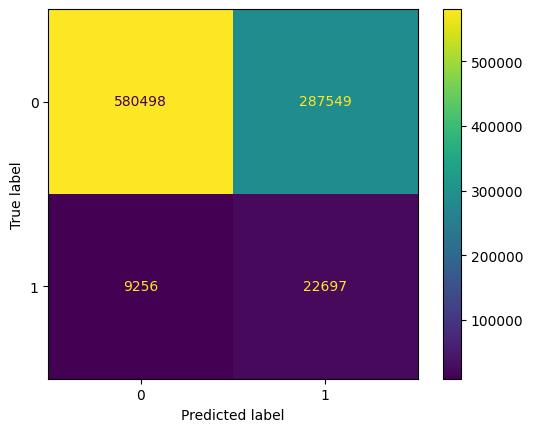

In [ ]:
# выведем confusion matrix
cm = confusion_matrix(ytest, HGBC.predict(Xtest), labels=HGBC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=HGBC.classes_)
disp.plot()
plt.show()

Модель находит больше 2/3 мошенников, но много и честных клиентов приравнивает к мошенникам.

Метрика улучшилась еще 0.23%. Возможно часть признаков производят шум и ухудшают качество модели. Попробуем найти их и избавиться от них.

## Отбор признаков от большего к меньшему

In [ ]:
def feat_select (cols, feat):
        cols_to_del = set() 
        for i in range(len(cols)):
            if cols[i].startswith(feat):
                cols_to_del.add(cols[i])
        cols_small = [x for x in cols if x not in list(cols_to_del)]

        return cols_small

In [ ]:
features = list(read_parquet_dataset_from_local(path, 0, 1).columns.values)
features.remove('id')

cols_to_ML = list(train_df.columns.values)

print(f'начальное количество столбцов: {len(cols_to_ML)}.')

Xtemp = train_df[cols_to_ML].drop(['id', 'flag'], axis=1)
ytemp = train_df['flag'].ravel()

XtrainTemp, XtestTemp, ytrainTemp, ytestTemp = train_test_split(Xtemp, ytemp, train_size=0.7, random_state=38)

model = HistGradientBoostingClassifier(
                                        random_state=38,
                                        class_weight='balanced',
                                        scoring='roc_auc',
                                        l2_regularization=0.6,
                                        max_iter=200, 
                                        min_samples_leaf=25
                                        )
        
model.fit(XtrainTemp, ytrainTemp)
predict_temp = model.predict_proba(XtestTemp)[:,1]
roc_auc = roc_auc_score(ytestTemp, predict_temp)
score = roc_auc

print(f'start_score: {score}')

for _ in range(0,3,1):
    for feat in features:
        cols_to_temp = feat_select(cols_to_ML, feat)
        
        Xtemp = train_df[cols_to_temp].drop(['id', 'flag'], axis=1)
        ytemp = train_df['flag'].ravel()

        XtrainTemp, XtestTemp, ytrainTemp, ytestTemp = train_test_split(Xtemp, ytemp, train_size=0.7, random_state=38)

        model = HistGradientBoostingClassifier(
                                                random_state=38,
                                                class_weight='balanced',
                                                scoring='roc_auc',
                                                l2_regularization=0.6,
                                                max_iter=200, 
                                                min_samples_leaf=25
                                                )
        
        model.fit(XtrainTemp, ytrainTemp)
        predict_temp = model.predict_proba(XtestTemp)[:,1]
        roc_auc = roc_auc_score(ytestTemp, predict_temp)
        print(f'score: {roc_auc}')

        if roc_auc >= score:
            cols_to_ML = cols_to_temp
            score = roc_auc
            features.remove(feat)
            print(f'Признак {feat} - удален.')
            print(f'новое количество столбцов: {len(cols_to_ML)}.')

        else:
            print(f'Признак {feat} - сохранен.')

train_data/train_data_0.pq
train_data/train_data_1.pq
train_data/train_data_2.pq
train_data/train_data_3.pq
train_data/train_data_4.pq
train_data/train_data_5.pq
train_data/train_data_6.pq
train_data/train_data_7.pq
train_data/train_data_8.pq
train_data/train_data_9.pq
train_data/train_data_10.pq
train_data/train_data_11.pq


Reading dataset with pandas:   0%|          | 0/1 [00:00<?, ?it/s]

chunk_path train_data/train_data_0.pq
начальное количество столбцов: 364.
start_score: 0.7588211015249471
score: 0.7592454292042571
Признак rn - удален.
новое количество столбцов: 363.
score: 0.7590148942752651
Признак pre_since_confirmed - сохранен.
score: 0.7572968321211264
Признак pre_pterm - сохранен.
score: 0.758788263667169
Признак pre_fterm - сохранен.
score: 0.7574519485229233
Признак pre_till_pclose - сохранен.
score: 0.7584836613808101
Признак pre_till_fclose - сохранен.
score: 0.7562075642669098
Признак pre_loans_credit_limit - сохранен.
score: 0.758406129949493
Признак pre_loans_next_pay_summ - сохранен.
score: 0.7581898030523765
Признак pre_loans_outstanding - сохранен.
score: 0.7592454292042571
Признак pre_loans_total_overdue - удален.
новое количество столбцов: 362.
score: 0.7551016918994006
Признак pre_loans_credit_cost_rate - сохранен.
score: 0.758620132345622
Признак pre_loans5 - сохранен.
score: 0.7583920841394773
Признак pre_loans530 - сохранен.
score: 0.75849022192

In [ ]:
print(f'лучшиее значение метрики roc-auc: {score:.4f}')

лучшиее значение метрики roc-auc: 0.7594


roc-auc test: 0.7590353302637445


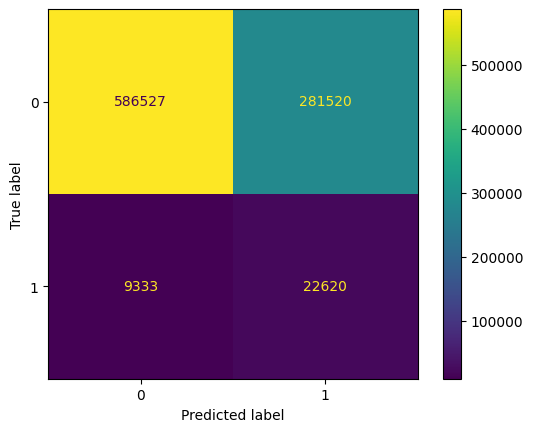

In [ ]:
predict_test = model.predict_proba(XtestTemp)[:,1]
print(f'roc-auc test: {roc_auc_score(ytestTemp, predict_test)}')

cm = confusion_matrix(ytestTemp, model.predict(XtestTemp), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Удалось уменьшить метрику еще на 0.02%, при этом показатель FalsePossitive улучшился на 3%, а FalseNegative ухудшился менее чем на 1%. 

Цель моделирования, получить модель с метрикой по roc-auc выше 0.75, достигнута.